In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams['figure.figsize'] = (15, 5)

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'Washington D.C.': 'DC',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

NE_states = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
west_states = ['CA', 'AZ', 'NV', 'OR', ' ID']
south_east_states = ['FL', 'GA', 'AL', 'MS', 'SC', 'NC', 'KY', 'LA', 'TN']

data_types = {'FIPSST': object, 
              'FIPSCNTY': object, 
              'FIPS': object, 
              'HHI_Index': np.float64, 
              'pop_Penetration': np.float64, 
              'Eligibles': np.float64,
              'Enrolled': np.float64
             }

df = pd.read_csv('MA_time_series_by_county.csv', dtype= data_types, parse_dates=['date'])
df['HHI_Index'] = df['HHI_Index'].round(0)
df['year'] = df['date'].map(lambda x: x.year)
df['s_state'] = df['state'].replace(us_state_abbrev)

#removing any data for puerto rico and virgin islands.  They don't map easily.
df = df[~df['state'].isin(['Puerto Rico', 'Virgin Islands'])]

# relative level of concentration taken from DOJ https://www.justice.gov/atr/herfindahl-hirschman-index
def comp(var):
    if var < 1500:
        return 'Low'
    elif 1500 <= var < 2500:
        return 'Medium'
    elif 2500 <= var < 4500:
        return 'High'
    else:
        return 'Very High'
    
df['HHI_conc_buck'] = df['HHI_Index'].apply(comp)

df.head()

,Unnamed: 0,state,county,FIPSST,FIPSCNTY,FIPS,Eligibles,Enrolled,date,pop_Penetration,y_fips,HHI_Index,5_pct_bonus,3.5_pct_bonus,0_pct_bonus,year,s_state,HHI_conc_buck
0,0,Alabama,Autauga,01,001,01001,9612.0,3049.0,2014-09-01,0.317208,2014-01001,2495.0,NaN,NaN,NaN,2014,AL,Medium
1,1,Alabama,Baldwin,01,003,01003,42730.0,13573.0,2014-09-01,0.317646,2014-01003,2061.0,NaN,NaN,NaN,2014,AL,Medium
2,2,Alabama,Barbour,01,005,01005,6097.0,896.0,2014-09-01,0.146958,2014-01005,5958.0,NaN,NaN,NaN,2014,AL,Very High
3,3,Alabama,Bibb,01,007,01007,4647.0,1690.0,2014-09-01,0.363675,2014-01007,2950.0,NaN,NaN,NaN,2014,AL,High
4,4,Alabama,Blount,01,009,01009,11385.0,4719.0,2014-09-01,0.414493,2014-01009,3087.0,NaN,NaN,NaN,2014,AL,High


In [18]:
# Selection of the most desirable counties, based on criteria below
df_ai = df[((df.Eligibles - df.Enrolled) > 50000) & (df.HHI_Index < 1500) & (df.pop_Penetration < 0.20)]

df_ai.drop_duplicates(subset=['FIPS'], inplace=True)
df_ai

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Unnamed: 0,state,county,FIPSST,FIPSCNTY,FIPS,Eligibles,Enrolled,date,pop_Penetration,y_fips,HHI_Index,5_pct_bonus,3.5_pct_bonus,0_pct_bonus,year,s_state,HHI_conc_buck
3389,3389,Arkansas,Pulaski,05,119,05119,73499.0,13884.0,2016-09-01,0.188901,2016-05119,1394.0,795.52,784.91,760.16,2016,AR,Low
4990,4990,New Hampshire,Hillsborough,33,011,33011,73208.0,7637.0,2016-09-01,0.104319,2016-33011,1343.0,826.54,815.14,788.54,2016,NH,Low
5100,5100,New York,Suffolk,36,103,36103,275855.0,47983.0,2016-09-01,0.173943,2016-36103,1348.0,872.06,858.98,828.46,2016,NY,Low
10887,10887,Massachusetts,Bristol,25,005,25005,116262.0,20836.0,2017-06-01,0.179216,2017-25005,1352.0,855.78,842.94,812.99,2017,MA,Low


Text(0.5, 1.0, 'Seaborn Distplot of Payment Rates - December 2017')

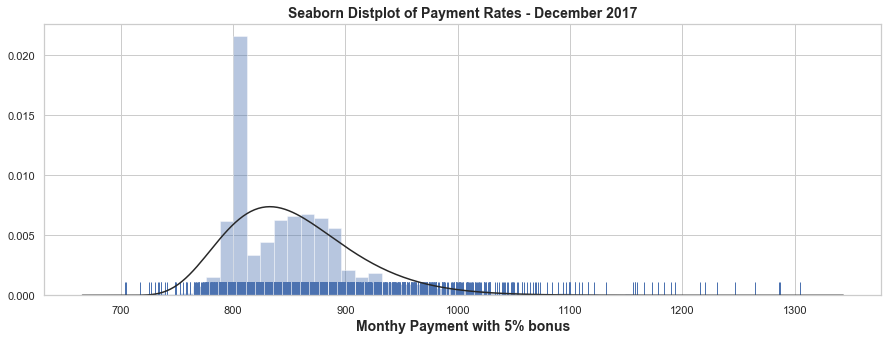

In [80]:
#plotting payment rates
data = df[df['date'] == pd.to_datetime('12/01/2017')]
data2 = data[~data['5_pct_bonus'].isnull()]
# data2['5_pct_bonus'].astype(int)
# data[data['5_pct_bonus'] == np.inf]
sns.distplot(data2['5_pct_bonus'].astype(int), kde=False, rug=True, fit=stats.gamma);
plt.xlabel('Monthy Payment with 5% bonus', fontsize=14, fontweight='bold')
plt.title('Seaborn Distplot of Payment Rates - December 2017', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Seaborn Distplot of Market Penetration Rates - December 2017')

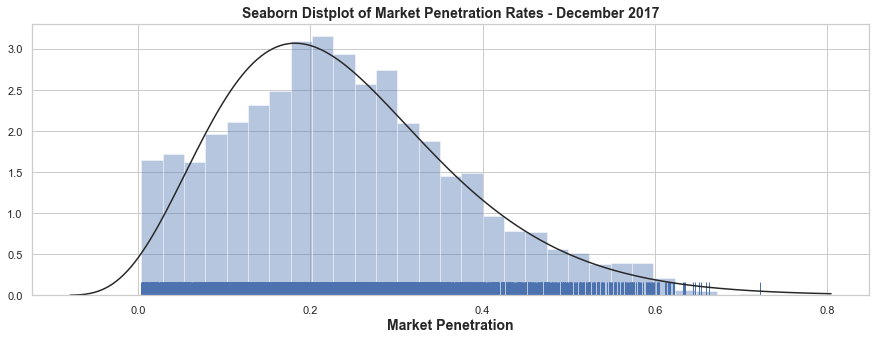

In [79]:
#plotting penetration rates
data = df[df['date'] == pd.to_datetime('12/01/2017')]
data2 = data[~data['pop_Penetration'].isnull()]
# data2['5_pct_bonus'].astype(int)
# data[data['5_pct_bonus'] == np.inf]
sns.distplot(data2['pop_Penetration'], kde=False, rug=True, fit=stats.gamma);
plt.xlabel('Market Penetration', fontsize=14, fontweight='bold')
plt.title('Seaborn Distplot of Market Penetration Rates - December 2017', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Seaborn Distplot of HHI index - December 2017')

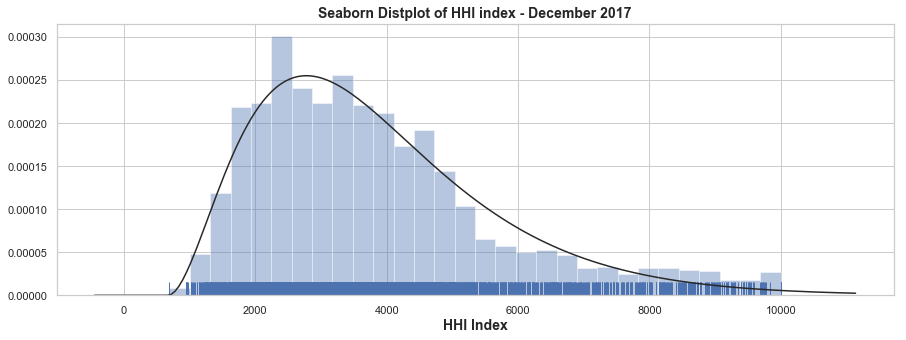

In [81]:
#plotting HHI index
data = df[df['date'] == pd.to_datetime('12/01/2017')]
data2 = data[~data['HHI_Index'].isnull()]
# data2['5_pct_bonus'].astype(int)
# data[data['5_pct_bonus'] == np.inf]
sns.distplot(data2['HHI_Index'], kde=False, rug=True, fit=stats.gamma);
plt.xlabel('HHI Index', fontsize=14, fontweight='bold')
plt.title('Seaborn Distplot of HHI index - December 2017', fontsize=14, fontweight='bold')

In [59]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='nflovejoy', api_key='57ld29nOStdQL2Nyykdj')


hhi = df[(df['date'] == pd.to_datetime('12/01/2017'))&(df['state'].isin(['California', 'Arizona', 'Nevada', 'Oregon', ' Idaho']))]
# hhi.info()

fig = ff.create_choropleth(
    fips=hhi['FIPS'], 
    values=hhi['pop_Penetration'],
    scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[.1, .2, .3, .4, .5, .6],
    legend_title='Penetration by County', 
    title='California and Nearby States - Dec 2017'
    
)
py.iplot(fig, filename='Chloropleth of Market Competition, as measured by county penetration rates')

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


/Users/lovejoy/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [65]:
hhi = df[df['date'] == pd.to_datetime('12/01/2017')]
hhi2 = hhi.dropna(subset=['HHI_Index'])
# hhi.info()

fig = ff.create_choropleth(
    fips=hhi2['FIPS'], 
    values=hhi2['HHI_Index'],
    binning_endpoints=[2000, 3000, 4000, 5000, 6000, 7000, 8000],
    legend_title='HHI by County', 
    title='United States - Dec 2017'
    
)
py.iplot(fig, filename='Chloropleth of Market Competition, as measure by HHI')

The draw time for this plot will be slow for clients without much RAM.


/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [68]:
pen = df[df['date'] == pd.to_datetime('12/01/2017')]
pen2 = pen.copy()
pen2.dropna(subset=['HHI_Index'], inplace=True)
# pen.info()

fig = ff.create_choropleth(
    fips=pen2['FIPS'], 
    values=pen2['pop_Penetration'],
    binning_endpoints=[.1, .2, .3, .4, .5, .6],
    legend_title='Market Penetration by County', 
    title='United States - Dec 2017'
    
)
py.iplot(fig, filename='Chloropleth of Market Competition, as measured by market penetration')

The draw time for this plot will be slow for clients without much RAM.


/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



/Users/lovejoy/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


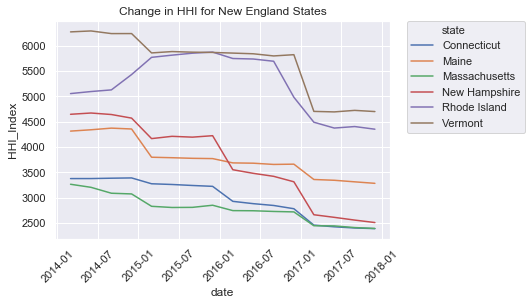

In [6]:
import seaborn as sns; sns.set()
NE_states = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']

hhi_change = pd.DataFrame(df.groupby(['date','state'])['HHI_Index'].mean())
hhi_change.reset_index(inplace=True)


hhi_change2 = hhi_change[hhi_change['state'].isin(NE_states)]

ax = sns.lineplot(x="date", y="HHI_Index", hue="state", data=hhi_change2)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Change in HHI for New England States')
plt.xticks(rotation=45)
pass

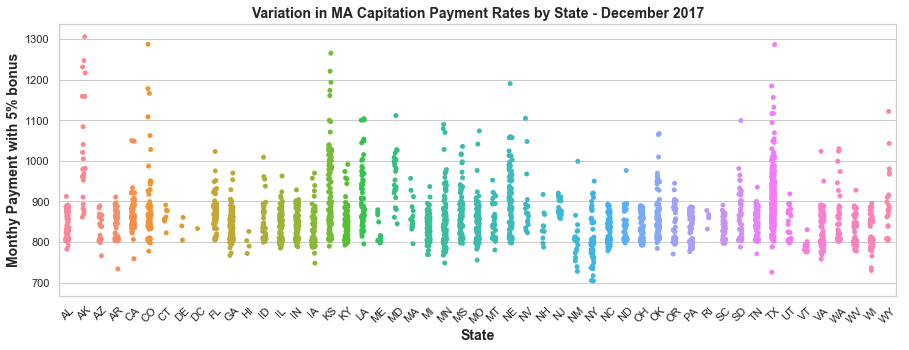

In [38]:
#Subset of data focused on december 2017
df_17 = df[df['date'] == pd.to_datetime('12/01/2017')]
# st_pay.groupby('state').date.count()

sns.stripplot(x="s_state", y="5_pct_bonus", data=df_17)
plt.xticks(rotation=45)
plt.ylabel('Monthy Payment with 5% bonus', fontsize=14, fontweight='bold')
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.title('Variation in MA Capitation Payment Rates by State - December 2017', fontsize=14, fontweight='bold')

pass

Text(0.5, 1.0, 'Relationship Between Market Penetration and Payment, by County')

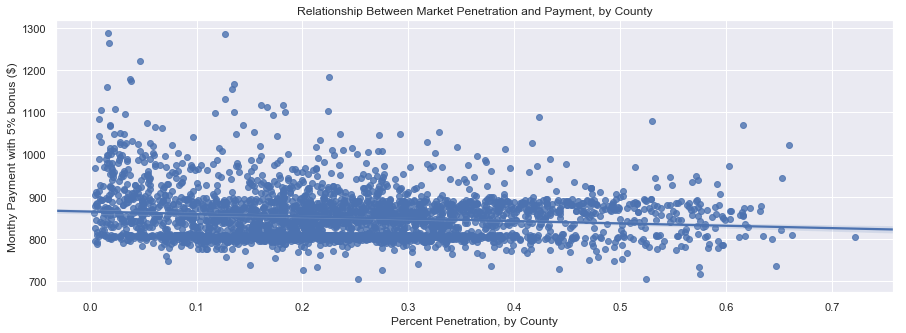

In [115]:
ax = sns.regplot(y="5_pct_bonus", x="pop_Penetration", data=df_17)
plt.ylabel('Monthy Payment with 5% bonus ($)')
plt.xlabel('Percent Penetration, by County')
plt.title('Relationship Between Market Penetration and Payment, by County')

# df_17.columns

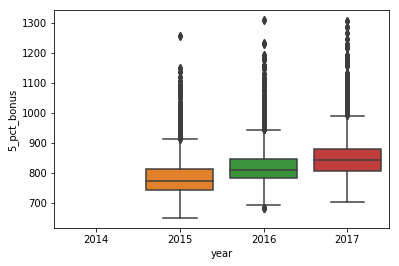

In [5]:
yr_pay = pd.DataFrame(df.groupby(['year'])['5_pct_bonus'].mean().reset_index())
yr_pay
# ax = sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=tips

ax = sns.boxplot(y="5_pct_bonus", x="year", data=df)

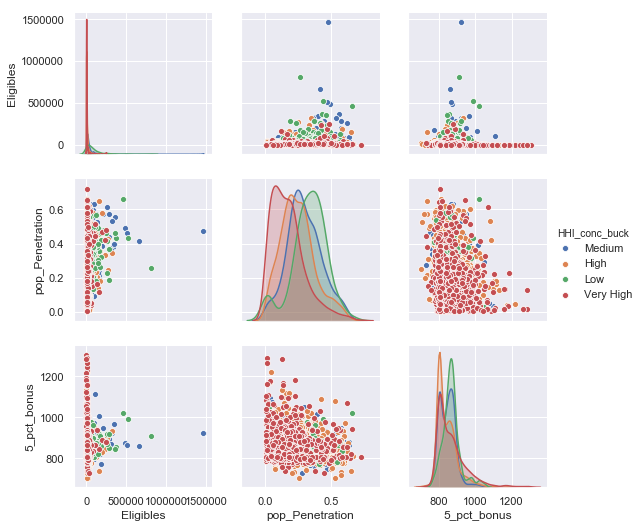

In [17]:
# sns.swarmplot(x="year", y="pop_Penetration", hue="HHI_conc_buck", data=df)
df2 = df[df['date'] == pd.to_datetime('12/1/2017')]
# df2.head()

sns.pairplot(df2[['Eligibles', 'pop_Penetration','5_pct_bonus', "HHI_conc_buck"]], hue="HHI_conc_buck")




Text(0.5, 1.0, 'Variation in MA Capitation Payment Rates by State - December 2017')

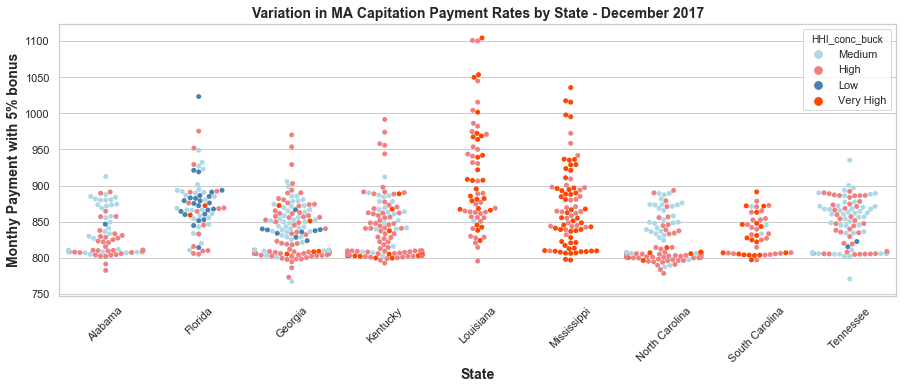

In [37]:
sns.set(style="whitegrid")
scale_palette ={"Low":"steelblue","Medium":"lightblue","High":"lightcoral", "Very High":"orangered"}


ne_states = df[df['state'].isin(NE_states)]
we_states = df[df['s_state'].isin(west_states)]
se_states = df[df['s_state'].isin(south_east_states)]

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="state", 
              y="5_pct_bonus",
              hue='HHI_conc_buck',
              palette=scale_palette,
              data=se_states[se_states['date'] == pd.to_datetime('12/01/2017')])
plt.xticks(rotation=45)
plt.ylabel('Monthy Payment with 5% bonus', fontsize=14, fontweight='bold')
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.title('Variation in MA Capitation Payment Rates by State - December 2017', fontsize=14, fontweight='bold')

In [77]:
#Measuring the percent change in enrollment overtime.  Market growth
growth = pd.DataFrame(df[df['year'].isin(['2014', '2017'])].groupby(['FIPS', 'year'])['Enrolled'].sum()).reset_index()
gpiv = growth.pivot(index='FIPS', columns='year', values = 'Enrolled')
gpiv_change = gpiv.pct_change(axis='columns')
gpiv_change.reset_index(inplace=True)

# values = {np.nan: 0, ...}
gpiv_change[2017].replace(np.inf, 0, inplace=True)
gpiv_change[2017].replace(np.nan, 0, inplace=True)
capped_gpiv_change = gpiv_change[gpiv_change[2017] < gpiv_change[2017].quantile(.95)]


fig = ff.create_choropleth(
    fips=capped_gpiv_change['FIPS'], 
    values=capped_gpiv_change[2017],
    binning_endpoints=[-.2, -.1, 0, .1, .2, .3, .4, .5],
    legend_title='Percent Growth', 
    title='Enrollment Growth (capped at 95%) - Dec 2014 to Dec 2017'
    
)
py.iplot(fig, filename='Chloropleth of Enrollment Growth (capped at 95%) - Dec 2014 to Dec 2017')

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/figure_factory/_county_choropleth.py:772: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [2280]



The draw time for this plot will be slow for all clients.


/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [83]:
#Measuring the percent change in HHI Index overtime.  Market growth
growth = pd.DataFrame(df[df['year'].isin(['2014', '2017'])].groupby(['FIPS', 'year'])['HHI_Index'].sum()).reset_index()
gpiv = growth.pivot(index='FIPS', columns='year', values = 'HHI_Index')
gpiv_change = gpiv.pct_change(axis='columns')
gpiv_change.reset_index(inplace=True)

# values = {np.nan: 0, ...}
gpiv_change[2017].replace(np.inf, 0, inplace=True)
gpiv_change[2017].replace(np.nan, 0, inplace=True)
capped_gpiv_change = gpiv_change[gpiv_change[2017] < gpiv_change[2017].quantile(.95)]

# sns.distplot(capped_gpiv_change[2017], kde=False, fit=stats.gamma);
# plt.xlabel('Change in HHI Index', fontsize=14, fontweight='bold')
# plt.title('Seaborn Distplot of Percent Change in HHI Index - Dec 2014 to Dec 2017', fontsize=14, fontweight='bold')

fig = ff.create_choropleth(
    fips=capped_gpiv_change['FIPS'], 
    values=capped_gpiv_change[2017],
    binning_endpoints=[-.4, -.3, -.2, -.1, 0, .1, .2, .3, .4],
    legend_title='Percent Change', 
    title='Change in HHI (capped at 95%) - Dec 2014 to Dec 2017'
    
)
py.iplot(fig, filename='Chloropleth of Change in HHI (capped at 95%) - Dec 2014 to Dec 2017')




/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/figure_factory/_county_choropleth.py:772: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [2280]



The draw time for this plot will be slow for all clients.


/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

